In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4,130.0,322,0,2,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3,115.0,564,0,2,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2,124.0,261,0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4,128.0,263,0,0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2,120.0,269,0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3,172.0,199,1,0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2,120.0,263,0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2,140.0,294,0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4,140.0,192,0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	1
float64		column 2	1
int64		column 3	0
float64		column 4	1
int64		column 5	0
int64		column 6	0
int64		column 7	0
float64		column 8	4
float64		column 9	3
float64		column 10	3
float64		column 11	3
float64		column 12	4
float64		column 13	4


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,269.000000,269.000000,270.000000,269.000000,270.000000,270.000000,270.000000,266.000000,267.000000,267.000000,267.000000,266.000000,266.000000
mean,0.680297,54.509294,3.174074,131.275093,249.659259,0.148148,1.022222,150.026316,0.329588,1.043820,1.588015,0.676692,4.691729
std,0.467231,9.039967,0.950090,17.858445,51.686237,0.355906,0.997891,22.925541,0.470946,1.140567,0.615226,0.948077,1.939385
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.750000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

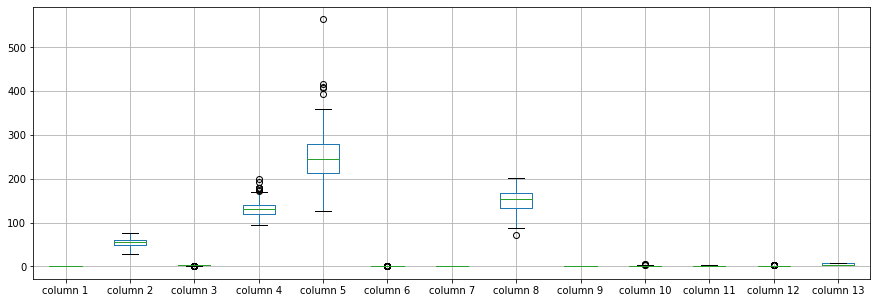

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.680297
column 2      54.509294
column 3       3.174074
column 4     131.275093
column 5     249.659259
column 6       0.148148
column 7       1.022222
column 8     150.026316
column 9       0.329588
column 10      1.043820
column 11      1.588015
column 12      0.676692
column 13      4.691729
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.085527,0.033780,-0.066213,-0.201066,0.040061,0.033919,-0.083066,0.176387,0.095967,0.050490,0.097361,0.403119
column 2,-0.085527,1.000000,0.079286,0.274302,0.211769,0.121156,0.137918,-0.394206,0.090065,0.181591,0.154838,0.349784,0.090264
column 3,0.033780,0.079286,1.000000,-0.042571,0.090465,-0.098537,0.074325,-0.337348,0.348315,0.160514,0.140266,0.218667,0.259353
column 4,-0.066213,0.274302,-0.042571,1.000000,0.174825,0.157675,0.120631,-0.044712,0.075745,0.205183,0.135785,0.084290,0.125482
column 5,-0.201066,0.211769,0.090465,0.174825,1.000000,0.025186,0.167652,-0.013917,0.069534,0.012856,-0.000849,0.121065,0.014700
column 6,0.040061,0.121156,-0.098537,0.157675,0.025186,1.000000,0.053499,0.016523,-0.004097,-0.023533,0.042373,0.121507,0.050698
column 7,0.033919,0.137918,0.074325,0.120631,0.167652,0.053499,1.000000,-0.079865,0.085548,0.109592,0.164643,0.111447,-0.001495
column 8,-0.083066,-0.394206,-0.337348,-0.044712,-0.013917,0.016523,-0.079865,1.000000,-0.402112,-0.356615,-0.381661,-0.263616,-0.235717
column 9,0.176387,0.090065,0.348315,0.075745,0.069534,-0.004097,0.085548,-0.402112,1.000000,0.266881,0.247865,0.153646,0.325098
column 10,0.095967,0.181591,0.160514,0.205183,0.012856,-0.023533,0.109592,-0.356615,0.266881,1.000000,0.603886,0.267588,0.317125


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+88,13+88+88,13+88+88+88,13+88+88+88+88,13+88+88+88+88+88,13+88+88+88+88,13+88+88+88,13+88+88,13+88,13], vae_layer = False, seed = 88)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 606.7183113098145
Epoch: 1 , loss: 607.515453338623
Epoch: 2 , loss: 606.0364685058594
Epoch: 3 , loss: 606.2089309692383
Epoch: 4 , loss: 606.4307403564453
Epoch: 5 , loss: 606.6875686645508
Epoch: 6 , loss: 607.2833938598633
Epoch: 7 , loss: 604.9946136474609
Epoch: 8 , loss: 605.2765312194824
Epoch: 9 , loss: 607.73681640625
Epoch: 10 , loss: 602.7115211486816
Epoch: 11 , loss: 601.0020790100098
Epoch: 12 , loss: 598.7951431274414
Epoch: 13 , loss: 597.9133033752441
Epoch: 14 , loss: 596.0727119445801
Epoch: 15 , loss: 594.7408866882324
Epoch: 16 , loss: 590.4264450073242
Epoch: 17 , loss: 590.6511764526367
Epoch: 18 , loss: 584.1039428710938
Epoch: 19 , loss: 572.4035568237305
Epoch: 20 , loss: 535.1210098266602
Epoch: 21 , loss: 496.5437870025635
Epoch: 22 , loss: 470.17616844177246
Epoch: 23 , loss: 445.6181945800781
Epoch: 24 , loss: 428.11534881591797
Epoch: 25 , loss: 415.09750175476074
Epoch:

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
266,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
267,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
268,0.0,0.0,0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(223.0945146696945, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.04120124033494759

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4,130.0,322,0,2,109.0,0.0,2.4,2.0,3.0,3.0
1,0.0,67.0,3,115.0,564,0,2,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2,124.0,261,0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4,128.0,263,0,0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2,120.0,269,0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3,172.0,199,1,0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2,120.0,263,0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2,140.0,294,0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4,140.0,192,0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [20]:
imputations[-1].to_excel("Sheart_AE_1(imp).xlsx", index=False, header=False)